<a href="https://colab.research.google.com/github/Raeab/ML-Playround/blob/main/Credit_Union_Classification_(Good_Borrower_Bad_Borrower)_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 3.0: Load data and split

In [1]:
# Importing pkgs that will be used
import pandas as pd
import numpy as np

In [2]:
# First, we'll read the provided labeled training data
df3 = pd.read_csv("https://drive.google.com/uc?export=download&id=1wOhyCnvGeY4jplxI8lZ-bbYN3zLtickf")
df3.info()

from sklearn.model_selection import train_test_split

X = df3.drop('BadCredit', axis=1) 
y = df3['BadCredit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   UserID             6000 non-null   object
 1   Sex                6000 non-null   object
 2   PreviousDefault    6000 non-null   int64 
 3   FirstName          6000 non-null   object
 4   LastName           6000 non-null   object
 5   NumberPets         6000 non-null   int64 
 6   PreviousAccounts   6000 non-null   int64 
 7   ResidenceDuration  6000 non-null   int64 
 8   Street             6000 non-null   object
 9   LicensePlate       6000 non-null   object
 10  BadCredit          6000 non-null   int64 
 11  Amount             6000 non-null   int64 
 12  Married            6000 non-null   int64 
 13  Duration           6000 non-null   int64 
 14  City               6000 non-null   object
 15  Purpose            6000 non-null   object
 16  DateOfBirth        6000 non-null   object


##3.0.1: EDA 

In [3]:
X_train.columns

Index(['UserID', 'Sex', 'PreviousDefault', 'FirstName', 'LastName',
       'NumberPets', 'PreviousAccounts', 'ResidenceDuration', 'Street',
       'LicensePlate', 'Amount', 'Married', 'Duration', 'City', 'Purpose',
       'DateOfBirth'],
      dtype='object')

In [4]:
X_train.shape

(4800, 16)

In [5]:
df3.isna().sum() # no missing 

UserID               0
Sex                  0
PreviousDefault      0
FirstName            0
LastName             0
NumberPets           0
PreviousAccounts     0
ResidenceDuration    0
Street               0
LicensePlate         0
BadCredit            0
Amount               0
Married              0
Duration             0
City                 0
Purpose              0
DateOfBirth          0
dtype: int64

In [6]:
print(round(df3.describe(),2))  # look at summary stat of numerical features for better understanding of the dataset.
# We can see here some are dummies.  

       PreviousDefault  NumberPets  PreviousAccounts  ResidenceDuration  \
count          6000.00     6000.00           6000.00            6000.00   
mean              0.02        1.02              1.01               1.99   
std               0.14        0.82              1.01               1.39   
min               0.00        0.00              0.00               0.00   
25%               0.00        0.00              0.00               1.00   
50%               0.00        1.00              1.00               2.00   
75%               0.00        2.00              2.00               3.00   
max               1.00        2.00              6.00               9.00   

       BadCredit   Amount  Married  Duration  
count    6000.00  6000.00  6000.00   6000.00  
mean        0.17  3591.30     0.51     24.15  
std         0.38   427.03     0.50      9.43  
min         0.00  2158.00     0.00      6.00  
25%         0.00  3290.00     0.00     18.00  
50%         0.00  3595.00     1.00     24.

In [7]:
# Drop the features that are not useful.
X_train_ = X_train.drop(['UserID','FirstName','LastName','LicensePlate','Street','NumberPets'], axis =1)  
# Drop date of birth since it is not in the right format and it will be transformed at a later step.
X_train_r = X_train_.drop(['DateOfBirth'], axis =1) 

In [8]:
# Check the distribution of dummies before one hot encoding.
X_train_r['Sex'].value_counts()

F    3338
M    1462
Name: Sex, dtype: int64

In [9]:
X_train_r['City'].value_counts()

North Judithbury    1319
East Jill            652
New Roberttown       467
East Jessetown       341
Lake Debra           278
Robinsonshire        252
Lisatown             169
Lake Roberto         164
Ericmouth            155
North Noahstad       139
Cassandraton         130
New Kellystad         99
Lake Chad             97
Herrerafurt           96
Ramirezstad           94
Port Keith            91
Port Jesseville       70
New Jessica           67
West Michael          64
Jacquelineland        56
Name: City, dtype: int64

In [10]:
X_train_r['Purpose'].value_counts()

NewCar       1455
UsedCar      1102
Other         740
Household     478
Vacation      350
Repair        348
Education     258
Business       69
Name: Purpose, dtype: int64

In [11]:
# Lets do OHE for categoricals.
X_train_r = pd.get_dummies(X_train_r, drop_first= True) 
X_train_r.dtypes

PreviousDefault          int64
PreviousAccounts         int64
ResidenceDuration        int64
Amount                   int64
Married                  int64
Duration                 int64
Sex_M                    uint8
City_East Jessetown      uint8
City_East Jill           uint8
City_Ericmouth           uint8
City_Herrerafurt         uint8
City_Jacquelineland      uint8
City_Lake Chad           uint8
City_Lake Debra          uint8
City_Lake Roberto        uint8
City_Lisatown            uint8
City_New Jessica         uint8
City_New Kellystad       uint8
City_New Roberttown      uint8
City_North Judithbury    uint8
City_North Noahstad      uint8
City_Port Jesseville     uint8
City_Port Keith          uint8
City_Ramirezstad         uint8
City_Robinsonshire       uint8
City_West Michael        uint8
Purpose_Education        uint8
Purpose_Household        uint8
Purpose_NewCar           uint8
Purpose_Other            uint8
Purpose_Repair           uint8
Purpose_UsedCar          uint8
Purpose_

In [12]:
pd.set_option('display.max_columns', None)
X_train_r

,PreviousDefault,PreviousAccounts,ResidenceDuration,Amount,Married,Duration,Sex_M,City_East Jessetown,City_East Jill,City_Ericmouth,City_Herrerafurt,City_Jacquelineland,City_Lake Chad,City_Lake Debra,City_Lake Roberto,City_Lisatown,City_New Jessica,City_New Kellystad,City_New Roberttown,City_North Judithbury,City_North Noahstad,City_Port Jesseville,City_Port Keith,City_Ramirezstad,City_Robinsonshire,City_West Michael,Purpose_Education,Purpose_Household,Purpose_NewCar,Purpose_Other,Purpose_Repair,Purpose_UsedCar,Purpose_Vacation
3897,0,0,2,3329,0,12,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
5628,0,2,2,2996,0,36,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1756,0,0,3,2470,0,24,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2346,0,1,2,3745,0,30,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2996,0,1,3,3549,0,36,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,0,1,1,3607,1,24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
5191,0,1,0,3186,0,30,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
5226,0,1,3,2387,1,36,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5390,0,1,3,3620,0,12,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


#### Visual checks

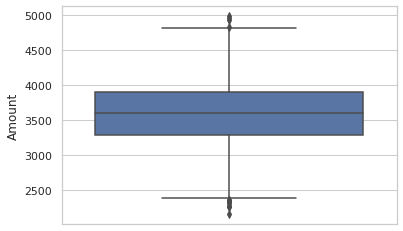

In [13]:
# check for outliers
import seaborn
 
seaborn.set(style='whitegrid')

seaborn.boxplot(y='Amount', data=X_train_r)

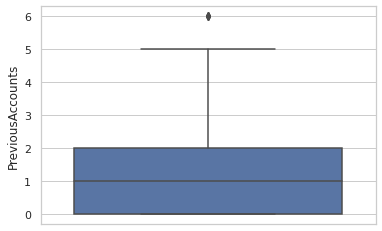

In [14]:
seaborn.boxplot(y='PreviousAccounts', data=X_train_r)

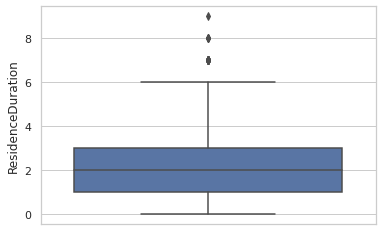

In [15]:
seaborn.boxplot(y='ResidenceDuration', data=X_train_r)

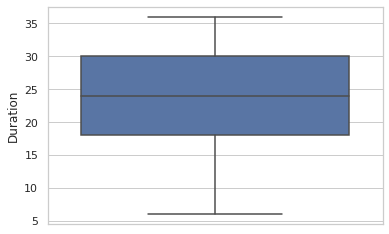

In [16]:
seaborn.boxplot(y='Duration', data=X_train_r)

In [17]:
# There are some outliers in Amount, Previous Accounts and Residence Duration.
## We can deal with them by standardizing on a later step but since we are using Decsion tree they won't be much of a problem.

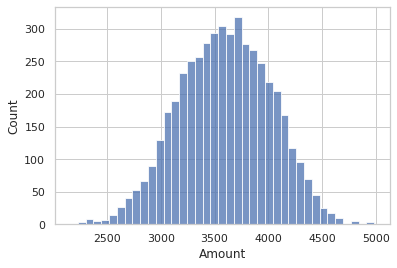

In [18]:
# Check distributions of the features. 
seaborn.histplot(X_train_r.Amount)

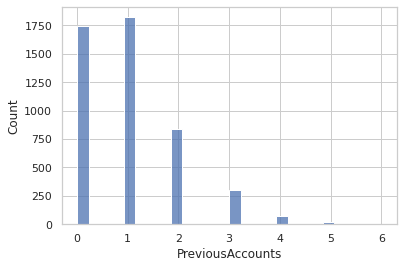

In [19]:
seaborn.histplot(X_train_r.PreviousAccounts)

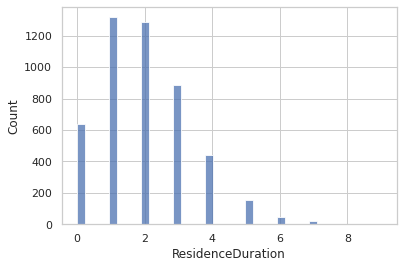

In [20]:
seaborn.histplot(X_train_r.ResidenceDuration)

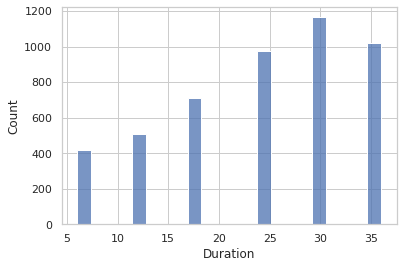

In [21]:
seaborn.histplot(X_train_r.Duration)

In [22]:
Num_feat = ['Amount','PreviousAccounts','ResidenceDuration','Duration']
X_train_r_num = X_train_r[Num_feat]

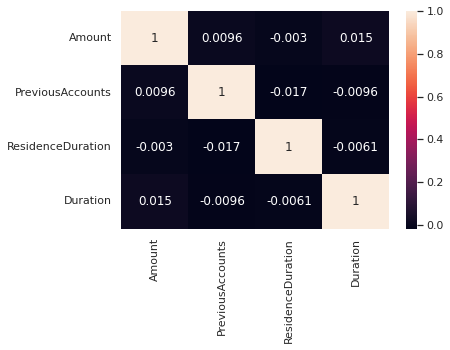

In [23]:
# Checking correlation using heatmap.
seaborn.heatmap(X_train_r_num.corr(), annot=True)

Let's go with Decision tree as our algorithm.

## 3.1: Baseline model

In [24]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier(random_state=0)
clf1.fit(X_train_r, y_train)

DecisionTreeClassifier(random_state=0)

In [25]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

pipe1 = Pipeline(steps=[
                        ("clf", clf1)
                        ])


scores = cross_val_score(pipe1, X_train_r, y_train, cv=10, scoring="f1_macro")

with np.printoptions(formatter={'float': '{: 0.3f}'.format}): 
  print("CV scores: {}".format(scores))
print("Estimated F1 Score: {:0.3f} +/- {:0.2f}".format(np.mean(scores), np.std(scores))) 

CV scores: [ 0.596  0.588  0.556  0.632  0.610  0.646  0.618  0.645  0.633  0.633]
Estimated F1 Score: 0.616 +/- 0.03


## 3.2: Feature engineering

In [26]:
# 1st Feature, age 
# Convert date of birth to age.
dateofb = pd.to_datetime(X_train_['DateOfBirth'])
born_year = dateofb.dt.year
from datetime import date 
today = date.today()
born_year = dateofb.dt.year
age_train = today.year - born_year
age_train

3897    53
5628    59
1756    48
2346    46
2996    47
        ..
3772    50
5191    50
5226    54
5390    56
860     35
Name: DateOfBirth, Length: 4800, dtype: int64

In [27]:
X_train.columns

Index(['UserID', 'Sex', 'PreviousDefault', 'FirstName', 'LastName',
       'NumberPets', 'PreviousAccounts', 'ResidenceDuration', 'Street',
       'LicensePlate', 'Amount', 'Married', 'Duration', 'City', 'Purpose',
       'DateOfBirth'],
      dtype='object')

In [28]:
X_train_r2 = X_train.drop(['DateOfBirth','UserID','FirstName','LastName','LicensePlate','Street','NumberPets'], axis = True) 
X_train_r2
X_train_r2a = X_train_r2.join(age_train)
X_train_r2a
X_train_r2a = X_train_r2a.rename(columns = {"DateOfBirth": "Age"})
X_train_r2a.head(5)

,Sex,PreviousDefault,PreviousAccounts,ResidenceDuration,Amount,Married,Duration,City,Purpose,Age
3897,M,0,0,2,3329,0,12,New Roberttown,Household,53
5628,F,0,2,2,2996,0,36,Ericmouth,Household,59
1756,F,0,0,3,2470,0,24,East Jill,NewCar,48
2346,F,0,1,2,3745,0,30,Lake Debra,UsedCar,46
2996,M,0,1,3,3549,0,36,North Judithbury,Vacation,47


In [29]:
#Feature 2, Selecting the top 10 cities and joining the remaining as Others. 
top10 = X_train_r2a['City'].value_counts().nlargest(10).index
top10

Index(['North Judithbury', 'East Jill', 'New Roberttown', 'East Jessetown',
       'Lake Debra', 'Robinsonshire', 'Lisatown', 'Lake Roberto', 'Ericmouth',
       'North Noahstad'],
      dtype='object')

In [30]:
X_train_r2a['City'] = X_train_r2a['City'].where(X_train_r2a['City'].isin(top10), 'Others')
X_train_r2a['City'].value_counts()

North Judithbury    1319
Others               864
East Jill            652
New Roberttown       467
East Jessetown       341
Lake Debra           278
Robinsonshire        252
Lisatown             169
Lake Roberto         164
Ericmouth            155
North Noahstad       139
Name: City, dtype: int64

In [31]:
#OHE dummies 
X_train_r2a = pd.get_dummies(X_train_r2a, drop_first= True)

In [32]:
X_train_r2a.head(5)

,PreviousDefault,PreviousAccounts,ResidenceDuration,Amount,Married,Duration,Age,Sex_M,City_East Jill,City_Ericmouth,City_Lake Debra,City_Lake Roberto,City_Lisatown,City_New Roberttown,City_North Judithbury,City_North Noahstad,City_Others,City_Robinsonshire,Purpose_Education,Purpose_Household,Purpose_NewCar,Purpose_Other,Purpose_Repair,Purpose_UsedCar,Purpose_Vacation
3897,0,0,2,3329,0,12,53,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
5628,0,2,2,2996,0,36,59,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1756,0,0,3,2470,0,24,48,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2346,0,1,2,3745,0,30,46,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2996,0,1,3,3549,0,36,47,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [33]:
# Feature 3, Standardization using yeo-johnson on all numerical features except age.
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
scaler.fit(X_train_r2a[Num_feat])
X_train_r2a[Num_feat] = scaler.transform(X_train_r2a[Num_feat])   

In [34]:
X_train_r2a.head(5)

,PreviousDefault,PreviousAccounts,ResidenceDuration,Amount,Married,Duration,Age,Sex_M,City_East Jill,City_Ericmouth,City_Lake Debra,City_Lake Roberto,City_Lisatown,City_New Roberttown,City_North Judithbury,City_North Noahstad,City_Others,City_Robinsonshire,Purpose_Education,Purpose_Household,Purpose_NewCar,Purpose_Other,Purpose_Repair,Purpose_UsedCar,Purpose_Vacation
3897,0,-1.200668,0.15345,-0.636222,0,-1.306903,53,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
5628,0,1.067827,0.15345,-1.399143,0,1.319214,59,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1756,0,-1.200668,0.79406,-2.566062,0,-0.096777,48,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2346,0,0.280965,0.15345,0.340515,0,0.589447,46,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2996,0,0.280965,0.79406,-0.122816,0,1.319214,47,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [35]:
pipe2 = Pipeline(steps=[
                        ("clf", clf1)
                        ])


scores = cross_val_score(pipe2, X_train_r2a, y_train, cv=10, scoring="f1_macro") 

with np.printoptions(formatter={'float': '{: 0.3f}'.format}): 
  print("CV scores: {}".format(scores))
print("Estimated F1 Score: {:0.3f} +/- {:0.2f}".format(np.mean(scores), np.std(scores))) 

CV scores: [ 0.691  0.735  0.690  0.703  0.697  0.750  0.724  0.695  0.653  0.771]
Estimated F1 Score: 0.711 +/- 0.03


Big boost with feature engineering.

## 3.3: Feature selection

In [36]:
# Recursive Feature Elimination (Wrapper Method)
from sklearn.feature_selection import RFECV, RFE
sel = RFE(estimator=clf1, n_features_to_select=25)
sel = sel.fit(X_train_r2a, y_train) 
X_train_r3 = sel.transform(X_train_r2a) # transform the train 

In [37]:
pipe3 = Pipeline(steps=[
                        ("clf", clf1)
                        ])

scores = cross_val_score(pipe3, X_train_r3, y_train, cv=10, scoring="f1_macro") 

with np.printoptions(formatter={'float': '{: 0.3f}'.format}):
  print("CV scores: {}".format(scores))
print("Estimated F1 Score: {:0.3f} +/- {:0.2f}".format(np.mean(scores), np.std(scores))) 

CV scores: [ 0.691  0.735  0.690  0.703  0.697  0.750  0.724  0.695  0.653  0.771]
Estimated F1 Score: 0.711 +/- 0.03


Performance is still the same with feature selection.

## 3.4: Hyperparameter tuning

In [38]:
from sklearn.model_selection import GridSearchCV
base_clf = DecisionTreeClassifier(splitter= "best", class_weight = None, random_state=0)
param_grid = {'criterion': ['gini', 'entropy'],
        'max_depth': [5,7,8,12,20],
        'max_leaf_nodes': [None,5,10,20,30,40,50,100],
        'min_impurity_decrease': [0,0.1,0.2],
        'min_samples_split' : [6,8,9,10],
        'min_samples_leaf' : [1,4,5,7] 
         }
clf_rs = GridSearchCV(base_clf, param_grid, scoring ='f1_macro', n_jobs=-1, cv=10, return_train_score=True)
%time clf_rs.fit(X_train_r2a, y_train)

CPU times: user 37.9 s, sys: 3.23 s, total: 41.1 s
Wall time: 8min 22s


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 7, 8, 12, 20],
                         'max_leaf_nodes': [None, 5, 10, 20, 30, 40, 50, 100],
                         'min_impurity_decrease': [0, 0.1, 0.2],
                         'min_samples_leaf': [1, 4, 5, 7],
                         'min_samples_split': [6, 8, 9, 10]},
             return_train_score=True, scoring='f1_macro')

In [39]:
Param = clf_rs.best_params_
Param

{'criterion': 'entropy',
 'max_depth': 5,
 'max_leaf_nodes': 5,
 'min_impurity_decrease': 0,
 'min_samples_leaf': 1,
 'min_samples_split': 6}

In [40]:
best_rs = DecisionTreeClassifier(**Param, random_state=0)
best_rs= best_rs.fit(X_train_r2a, y_train)

In [41]:
scores = cross_val_score(best_rs, X_train_r2a, y_train, cv=10, scoring="f1_macro") 


with np.printoptions(formatter={'float': '{: 0.3f}'.format}): 
  print("CV scores: {}".format(scores))
print("Estimated F1 Score: {:0.3f} +/- {:0.2f}".format(np.mean(scores), np.std(scores))) 

CV scores: [ 0.790  0.769  0.767  0.747  0.804  0.805  0.784  0.774  0.750  0.830]
Estimated F1 Score: 0.782 +/- 0.02


Big boost by hyperparameter tuning.

## 3.5: Performance estimation

## 3.5.1 Pre-processing

In [42]:
# Drop the variables that are not useful.
X_test_ = X_test.drop(['UserID','FirstName','LastName','LicensePlate','Street','NumberPets'], axis =1)
X_test_r = X_test_.drop(['DateOfBirth'], axis =1)

In [43]:
# Convert date of birth to age.
X_test_
dateofbt = pd.to_datetime(X_test_['DateOfBirth'])
born_yeart = dateofbt.dt.year
from datetime import date 
today = date.today()
born_yeart = dateofbt.dt.year
age_test = today.year - born_yeart
age_test

X_test_r2 = X_test_r.join(age_test) 
X_test_r2

X_test_r2 = X_test_r2.rename(columns = {"DateOfBirth": "Age"})
X_test_r2.head(5)

,Sex,PreviousDefault,PreviousAccounts,ResidenceDuration,Amount,Married,Duration,City,Purpose,Age
1782,F,0,1,3,3773,0,36,North Judithbury,NewCar,53
3917,F,0,0,3,3412,0,24,Lake Roberto,UsedCar,60
221,F,0,2,0,4146,0,24,West Michael,NewCar,53
2135,M,0,1,1,3608,1,30,East Jessetown,UsedCar,60
5224,F,0,1,1,2947,1,24,North Judithbury,NewCar,45


In [44]:
# Declaring top 10 cities.
top10t = X_test_r2['City'].value_counts().nlargest(10).index
top10t

Index(['North Judithbury', 'East Jill', 'New Roberttown', 'East Jessetown',
       'Lake Debra', 'Robinsonshire', 'Ericmouth', 'Lisatown',
       'North Noahstad', 'Lake Roberto'],
      dtype='object')

In [45]:
X_test_r2['City'] = X_test_r2['City'].where(X_test_r2['City'].isin(top10t), 'Others')
X_test_r2['City'].value_counts()

North Judithbury    332
Others              221
East Jill           169
New Roberttown      126
East Jessetown       80
Lake Debra           58
Robinsonshire        53
Ericmouth            47
Lisatown             44
North Noahstad       36
Lake Roberto         34
Name: City, dtype: int64

In [46]:
X_test_r2 = pd.get_dummies(X_test_r2, drop_first=True)  
X_test_r2.dtypes

PreviousDefault          int64
PreviousAccounts         int64
ResidenceDuration        int64
Amount                   int64
Married                  int64
Duration                 int64
Age                      int64
Sex_M                    uint8
City_East Jill           uint8
City_Ericmouth           uint8
City_Lake Debra          uint8
City_Lake Roberto        uint8
City_Lisatown            uint8
City_New Roberttown      uint8
City_North Judithbury    uint8
City_North Noahstad      uint8
City_Others              uint8
City_Robinsonshire       uint8
Purpose_Education        uint8
Purpose_Household        uint8
Purpose_NewCar           uint8
Purpose_Other            uint8
Purpose_Repair           uint8
Purpose_UsedCar          uint8
Purpose_Vacation         uint8
dtype: object

In [47]:
scaler.fit(X_test_r2[Num_feat])
X_test_r2[Num_feat] = scaler.transform(X_test_r2[Num_feat])   

In [48]:
X_test_r2.head(5)

,PreviousDefault,PreviousAccounts,ResidenceDuration,Amount,Married,Duration,Age,Sex_M,City_East Jill,City_Ericmouth,City_Lake Debra,City_Lake Roberto,City_Lisatown,City_New Roberttown,City_North Judithbury,City_North Noahstad,City_Others,City_Robinsonshire,Purpose_Education,Purpose_Household,Purpose_NewCar,Purpose_Other,Purpose_Repair,Purpose_UsedCar,Purpose_Vacation
1782,0,0.262137,0.809871,0.441815,0,1.349285,53,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
3917,0,-1.188475,0.809871,-0.396003,0,-0.012271,60,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
221,0,1.048009,-1.753005,1.341233,0,-0.012271,53,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
2135,0,0.262137,-0.646773,0.054775,1,0.652854,60,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
5224,0,0.262137,-0.646773,-1.424494,1,-0.012271,45,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0


## Prediction 

In [49]:
from sklearn.metrics import classification_report 
y_pred_rs =clf_rs.predict(X_test_r2)
print(classification_report(y_test, y_pred_rs))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93       991
           1       0.67      0.71      0.69       209

    accuracy                           0.89      1200
   macro avg       0.81      0.82      0.81      1200
weighted avg       0.89      0.89      0.89      1200



We have done well with F1-Macro score of 0.81 which is even better than train results of 0.78. This reflects we have not overfit the data. 